In [0]:
import os
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from scipy.stats import skew
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
os.chdir('/content/drive/My Drive/project/caterpillar-tube-pricing')

In [0]:
#Read each file in a separate data frame.
bill_of_materials = pd.read_csv('./data/bill_of_materials.csv')
components = pd.read_csv('./data/components.csv')
comp_adaptor = pd.read_csv('./data/comp_adaptor.csv')
comp_boss = pd.read_csv('./data/comp_boss.csv')
comp_elbow = pd.read_csv('./data/comp_elbow.csv')
comp_float = pd.read_csv('./data/comp_float.csv')
comp_hfl = pd.read_csv('./data/comp_hfl.csv')
comp_nut = pd.read_csv('./data/comp_nut.csv')
comp_other = pd.read_csv('./data/comp_other.csv')
comp_sleeve = pd.read_csv('./data/comp_sleeve.csv')
comp_straight = pd.read_csv('./data/comp_straight.csv')
comp_tee = pd.read_csv('./data/comp_tee.csv')
comp_threaded = pd.read_csv('./data/comp_threaded.csv')
specs = pd.read_csv('./data/specs.csv')
tube = pd.read_csv('./data/tube.csv')
tube_end_form = pd.read_csv('./data/tube_end_form.csv')
type_component = pd.read_csv('./data/type_component.csv')
type_connection = pd.read_csv('./data/type_connection.csv')
type_end_form = pd.read_csv('./data/type_end_form.csv')
train = pd.read_csv('./data/train_set.csv', parse_dates=[2,])
test = pd.read_csv('./data/test_set.csv', parse_dates=[3,])


In [4]:
print(bill_of_materials.shape)
bill_of_materials.head()

(21198, 17)


,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2.0,C-1629,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1.0,C-1631,1.0,C-1641,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
bill_of_materials.isnull().sum()

tube_assembly_id        0
component_id_1       2049
quantity_1           2049
component_id_2       6412
quantity_2           6412
component_id_3      16407
quantity_3          16400
component_id_4      20591
quantity_4          20590
component_id_5      21106
quantity_5          21106
component_id_6      21172
quantity_6          21172
component_id_7      21191
quantity_7          21191
component_id_8      21197
quantity_8          21197
dtype: int64

In [6]:
print(comp_adaptor.shape)
comp_adaptor



(25, 20)


,component_id,component_type_id,adaptor_angle,overall_length,end_form_id_1,connection_type_id_1,length_1,thread_size_1,thread_pitch_1,nominal_size_1,end_form_id_2,connection_type_id_2,length_2,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,unique_feature,orientation,weight
0,C-0005,CP-028,NaN,58.40,A-001,B-001,NaN,1.312,12.0,NaN,A-001,B-004,NaN,1.000,11.5,NaN,34.93,No,No,0.206
1,C-0006,CP-028,NaN,34.80,A-001,B-001,NaN,0.437,20.0,NaN,A-001,B-005,NaN,0.750,16.0,NaN,22.20,No,No,0.083
2,C-1435,CP-028,NaN,20.30,A-007,B-004,NaN,NaN,NaN,15.88,A-001,B-007,NaN,0.875,18.0,NaN,22.22,No,No,0.023
3,C-1546,CP-028,NaN,26.40,A-007,B-004,NaN,0.125,27.0,NaN,A-001,B-004,NaN,0.125,27.0,NaN,15.88,No,No,0.026
4,C-1583,CP-028,NaN,44.50,A-001,B-005,NaN,1.312,12.0,NaN,A-007,B-005,NaN,1.062,12.0,NaN,38.10,No,No,0.256
5,C-1634,CP-028,NaN,34.50,A-001,B-005,NaN,0.750,16.0,NaN,A-001,B-002,NaN,0.687,16.0,NaN,22.23,No,No,0.060
6,C-1975,CP-028,NaN,13.20,A-007,B-007,NaN,NaN,NaN,3.18,A-001,B-007,NaN,0.312,28.0,NaN,NaN,No,No,0.005
7,C-0428,CP-028,NaN,26.99,A-001,B-004,NaN,0.250,18.0,NaN,A-007,NaN,NaN,NaN,NaN,9.52,17.46,No,No,0.032
8,C-0443,CP-028,NaN,22.35,A-007,B-007,NaN,NaN,NaN,19.05,9999,9999,NaN,1.062,16.0,NaN,26.97,No,No,NaN
9,C-0823,CP-028,NaN,16.80,A-007,B-007,NaN,NaN,NaN,9.52,A-001,9999,NaN,0.625,18.0,9.52,15.75,No,No,0.014


In [7]:
comp_adaptor.isnull().sum()

component_id             0
component_type_id        0
adaptor_angle           24
overall_length           1
end_form_id_1            0
connection_type_id_1     1
length_1                24
thread_size_1            8
thread_pitch_1           8
nominal_size_1          17
end_form_id_2            0
connection_type_id_2     1
length_2                24
thread_size_2            2
thread_pitch_2           2
nominal_size_2          23
hex_size                 8
unique_feature           0
orientation              0
weight                   2
dtype: int64

In [8]:


# component_type_id, end_form_id_1, connection_type_id_1, end_form_id_2, connection_type_id_2, it is useless in all files.

# adaptor_angle - only one value. 

# unique_feature, orientation - categorical description. 

# C-1695 has abnormal values. And only one tube assembly has it. So I'll drop it.

# C-0443 has NaN weight. And it belongs to only one tube assembly, which has two components, both with NaN weight. So drop.

# C-1868. It seems that for some reason overall_length wasn't calculated. I'll calculate it as a sum of length_1 and length_2. Drop length_1 and length_2 after using becasue it of 
#no use now


comp_adaptor.drop(['adaptor_angle', 'component_type_id', 'end_form_id_1', 'connection_type_id_1', 'length_1', 'length_2',
                   'unique_feature', 'orientation', 'end_form_id_2', 'connection_type_id_2'], axis=1, inplace=True)

#Could input a formula, but it single value.
comp_adaptor.loc[comp_adaptor['overall_length'].isnull(), 'overall_length'] = 93.5
comp_adaptor.drop(comp_adaptor.index[[8, 21]], inplace=True)
print(comp_adaptor.shape)
comp_adaptor

(23, 10)


,component_id,overall_length,thread_size_1,thread_pitch_1,nominal_size_1,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,weight
0,C-0005,58.40,1.312,12.0,NaN,1.000,11.5,NaN,34.93,0.206
1,C-0006,34.80,0.437,20.0,NaN,0.750,16.0,NaN,22.20,0.083
2,C-1435,20.30,NaN,NaN,15.88,0.875,18.0,NaN,22.22,0.023
3,C-1546,26.40,0.125,27.0,NaN,0.125,27.0,NaN,15.88,0.026
4,C-1583,44.50,1.312,12.0,NaN,1.062,12.0,NaN,38.10,0.256
5,C-1634,34.50,0.750,16.0,NaN,0.687,16.0,NaN,22.23,0.060
6,C-1975,13.20,NaN,NaN,3.18,0.312,28.0,NaN,NaN,0.005
7,C-0428,26.99,0.250,18.0,NaN,NaN,NaN,9.52,17.46,0.032
9,C-0823,16.80,NaN,NaN,9.52,0.625,18.0,9.52,15.75,0.014
10,C-0354,36.30,1.250,11.5,NaN,1.000,11.5,NaN,44.45,0.136


In [9]:
print(comp_boss.shape)
comp_boss.head()

(147, 15)


,component_id,component_type_id,type,connection_type_id,outside_shape,base_type,height_over_tube,bolt_pattern_long,bolt_pattern_wide,groove,base_diameter,shoulder_diameter,unique_feature,orientation,weight
0,C-0008,CP-018,Boss,B-005,Round,Flat Bottom,17.0,NaN,NaN,No,22.0,NaN,Yes,Yes,0.032
1,C-0009,CP-018,Boss,B-004,Round,Flat Bottom,13.0,NaN,NaN,No,25.0,NaN,No,Yes,0.033
2,C-0020,CP-018,Boss,B-005,Round,Saddle,28.4,NaN,NaN,No,35.0,NaN,Yes,Yes,0.070
3,C-0054,CP-018,Boss,B-005,Round,Saddle,27.1,NaN,NaN,No,NaN,NaN,Yes,Yes,0.180
4,C-0071,CP-018,Boss,B-005,Round,Shoulder,20.0,NaN,NaN,No,30.0,23.0,Yes,Yes,0.080


In [10]:
comp_boss.isnull().sum()

component_id            0
component_type_id       0
type                   23
connection_type_id      0
outside_shape          23
base_type              23
height_over_tube        0
bolt_pattern_long     124
bolt_pattern_wide     130
groove                  0
base_diameter          90
shoulder_diameter     117
unique_feature          0
orientation             0
weight                  2
dtype: int64

In [11]:
#Use only important information.
comp_boss = comp_boss[['component_id', 'height_over_tube', 'weight']]
comp_boss.head()

,component_id,height_over_tube,weight
0,C-0008,17.0,0.032
1,C-0009,13.0,0.033
2,C-0020,28.4,0.070
3,C-0054,27.1,0.180
4,C-0071,20.0,0.080


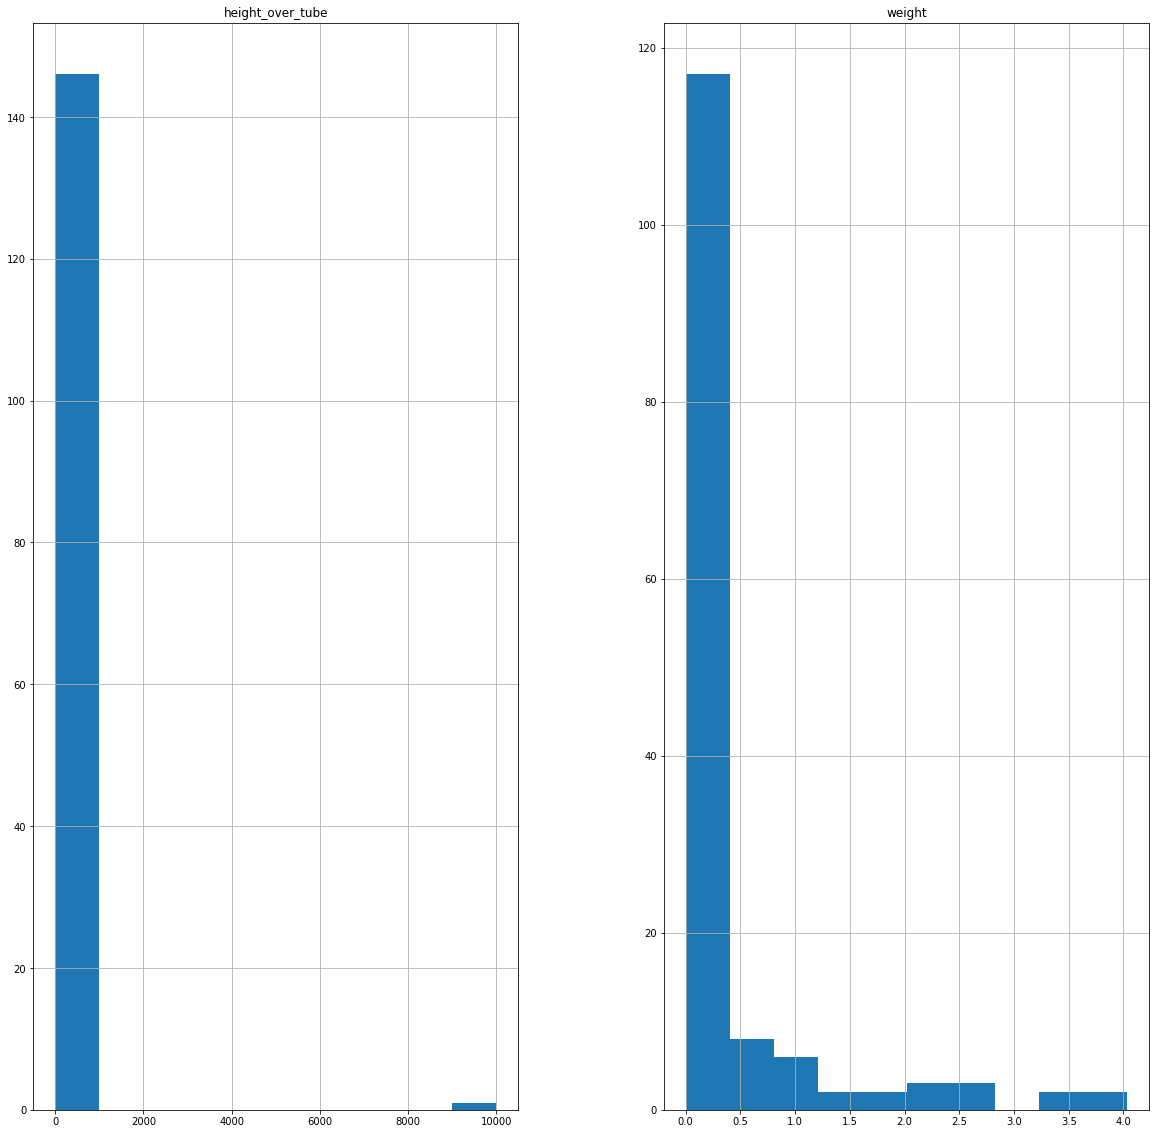

In [12]:
comp_boss.hist(figsize=(20,20))
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


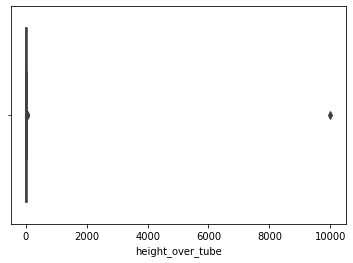

In [13]:
import seaborn as sns
sns.boxplot(x=comp_boss["height_over_tube"])

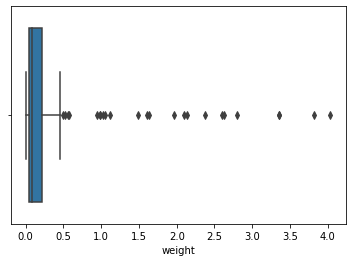

In [14]:
sns.boxplot(x=comp_boss["weight"])

In [15]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_boss.columns:
    if comp_boss[i].dtype != object:
        IQR = comp_boss[i].quantile(0.75)-comp_boss[i].quantile(0.25)
        upperThres = comp_boss[i].quantile(0.75)+3*IQR
        print()
        print(upperThres)
        if comp_boss[i][comp_boss[i] > upperThres].any() == True:
            print(i)
            print(comp_boss.loc[comp_boss[i] == comp_boss[i].max()])




49.275000000000006
height_over_tube
   component_id  height_over_tube  weight
31       C-0307            9999.0    1.05

0.7179999999999999
weight
   component_id  height_over_tube  weight
21       C-0243              36.0   4.034


In [16]:
comp_boss.drop(comp_boss.index[31], inplace=True)
comp_boss.head()

,component_id,height_over_tube,weight
0,C-0008,17.0,0.032
1,C-0009,13.0,0.033
2,C-0020,28.4,0.070
3,C-0054,27.1,0.180
4,C-0071,20.0,0.080


In [17]:
comp_hfl.head()

,component_id,component_type_id,hose_diameter,corresponding_shell,coupling_class,material,plating,orientation,weight
0,C-0872,CP-023,4.8,C-0855,SP-0098,SP-0016,Yes,No,0.010
1,C-0873,CP-023,4.8,C-0856,SP-0098,SP-0016,Yes,No,0.010
2,C-0874,CP-023,4.8,C-0857,SP-0098,SP-0038,Yes,No,0.001
3,C-1039,CP-023,15.9,C-1040,SP-0097,SP-0095,No,No,0.052
4,C-1041,CP-023,15.9,C-1042,SP-0099,SP-0095,No,No,0.065


In [18]:
#take only the useful columns
comp_hfl = comp_hfl[['component_id', 'hose_diameter', 'weight']]
comp_hfl

,component_id,hose_diameter,weight
0,C-0872,4.8,0.010
1,C-0873,4.8,0.010
2,C-0874,4.8,0.001
3,C-1039,15.9,0.052
4,C-1041,15.9,0.065
5,C-1043,25.4,0.196


In [19]:
comp_elbow.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,elbow_angle,mj_class_code,mj_plug_class_code,plug_diameter,groove,unique_feature,orientation,weight
0,C-0013,CP-008,152.4,92.08,105.0,185.0,113.0,75.0,90.0,NaN,NaN,NaN,Yes,No,Yes,8.890
1,C-0016,CP-009,57.2,27.80,42.0,69.0,44.0,24.0,90.0,NaN,NaN,NaN,No,No,Yes,1.172
2,C-0017,CP-009,57.2,27.80,42.0,69.0,47.0,26.0,90.0,NaN,NaN,NaN,Yes,No,Yes,1.245
3,C-0018,CP-009,66.6,31.80,50.0,80.0,57.0,31.5,90.0,NaN,NaN,NaN,Yes,No,Yes,1.863
4,C-0021,CP-010,75.0,NaN,31.5,70.0,25.0,12.5,90.0,NaN,NaN,NaN,No,Yes,Yes,0.903


In [20]:


#Most of the columns aren't necessary.
comp_elbow.drop(['component_type_id', 'mj_class_code', 'mj_plug_class_code', 'plug_diameter', 'groove', 'unique_feature',
                 'orientation',], axis=1, inplace=True)

comp_elbow.head()

,component_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,elbow_angle,weight
0,C-0013,152.4,92.08,105.0,185.0,113.0,75.0,90.0,8.890
1,C-0016,57.2,27.80,42.0,69.0,44.0,24.0,90.0,1.172
2,C-0017,57.2,27.80,42.0,69.0,47.0,26.0,90.0,1.245
3,C-0018,66.6,31.80,50.0,80.0,57.0,31.5,90.0,1.863
4,C-0021,75.0,NaN,31.5,70.0,25.0,12.5,90.0,0.903


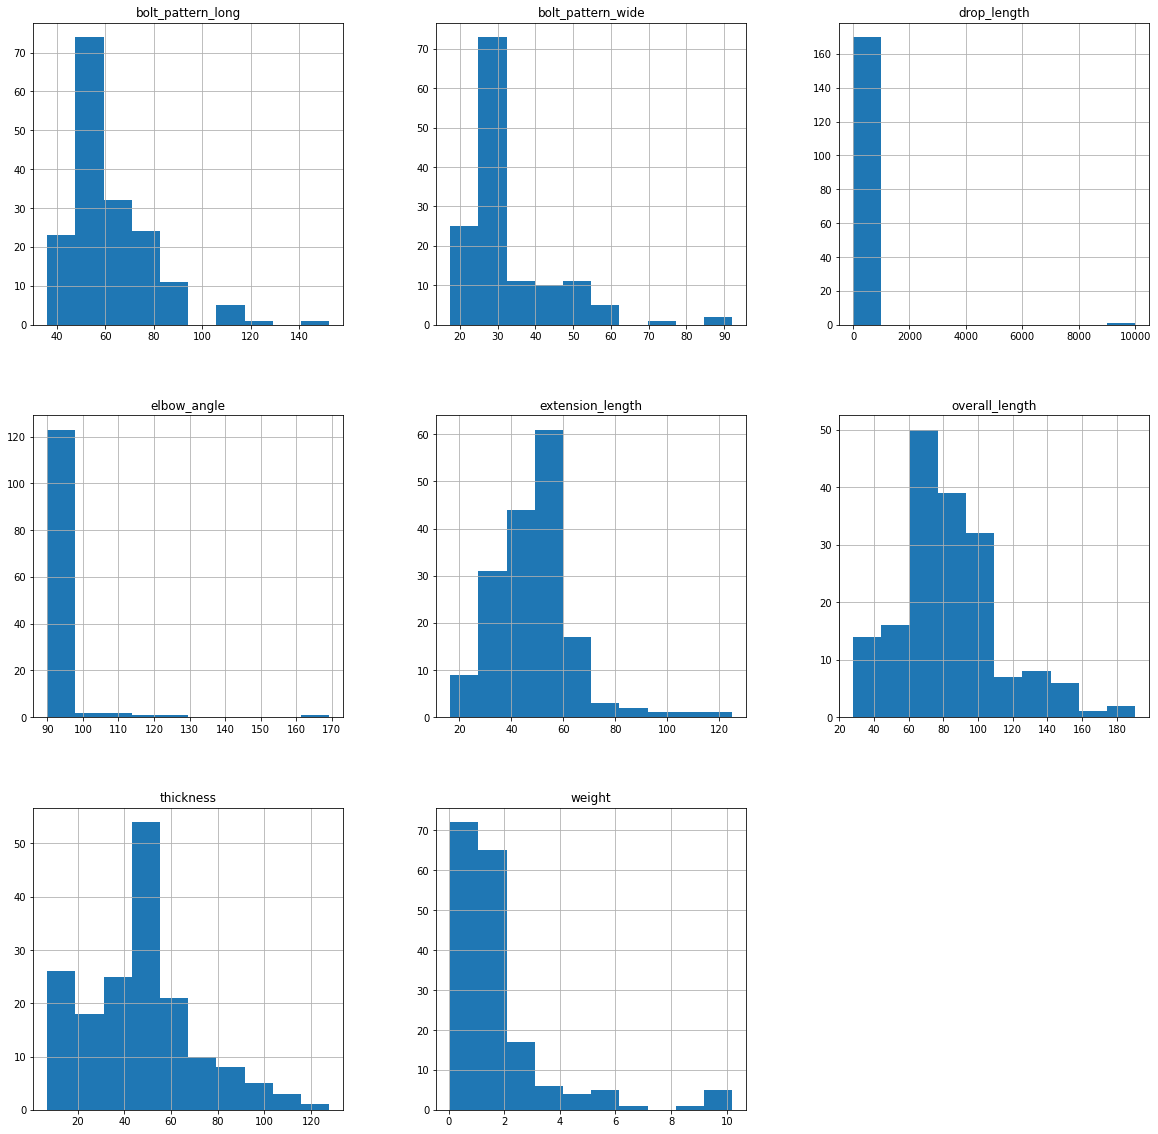

In [21]:
comp_elbow.hist(figsize=(20,20))
plt.show()

In [22]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_elbow.columns:
    if comp_elbow[i].dtype != object:
        IQR = comp_elbow[i].quantile(0.75)-comp_elbow[i].quantile(0.25)
        upperThres = comp_elbow[i].quantile(0.75)+3*IQR
      
        if comp_elbow[i][comp_elbow[i] > upperThres].any() == True:
            print(i)
            print(comp_elbow.loc[comp_elbow[i] == comp_elbow[i].max()])



bolt_pattern_long
  component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  overall_length  thickness  drop_length  elbow_angle  weight
0       C-0013              152.4              92.08             105.0           185.0      113.0         75.0         90.0    8.89
bolt_pattern_wide
  component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  overall_length  thickness  drop_length  elbow_angle  weight
0       C-0013              152.4              92.08             105.0           185.0      113.0         75.0         90.0    8.89
extension_length
   component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  overall_length  thickness  drop_length  elbow_angle  weight
26       C-0169             106.38              61.93             125.0          190.55      127.7        100.0         90.0   9.805
drop_length
   component_id  bolt_pattern_long  bolt_pattern_wide  extension_length  overall_length  thickness  drop_length  elbow_angle  weight
52      

In [0]:
comp_elbow.drop(comp_elbow.index[52], inplace=True)

In [24]:
comp_float.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,thickness,orientation,weight
0,C-0027,CP-021,148.00,96.00,18.00,Yes,2.230
1,C-0454,CP-022,58.72,30.18,28.00,No,0.590
2,C-0455,CP-022,58.72,30.18,28.00,No,0.525
3,C-0494,CP-022,52.40,26.20,15.85,No,0.230
4,C-0496,CP-022,58.80,30.20,14.20,No,0.284


In [25]:
#Drop not required columns.
comp_float.drop(['component_type_id', 'orientation'], axis=1, inplace=True)
comp_float

,component_id,bolt_pattern_long,bolt_pattern_wide,thickness,weight
0,C-0027,148.00,96.00,18.00,2.230
1,C-0454,58.72,30.18,28.00,0.590
2,C-0455,58.72,30.18,28.00,0.525
3,C-0494,52.40,26.20,15.85,0.230
4,C-0496,58.80,30.20,14.20,0.284
5,C-0508,77.76,42.88,25.40,1.144
6,C-0572,69.85,35.71,15.70,0.447
7,C-0797,120.65,69.85,20.00,1.983
8,C-0891,47.62,22.22,28.00,0.465
9,C-1096,76.40,69.90,25.00,2.565


In [26]:
comp_nut.head()

,component_id,component_type_id,hex_nut_size,seat_angle,length,thread_size,thread_pitch,diameter,blind_hole,orientation,weight
0,C-1621,CP-025,20.64,NaN,17.0,.687,16.0,NaN,NaN,No,0.015
1,C-1624,CP-025,34.92,NaN,26.5,1.187,12.0,NaN,NaN,No,0.035
2,C-1623,CP-025,28.58,NaN,23.5,1.000,14.0,NaN,NaN,No,0.044
3,C-1622,CP-025,23.81,NaN,20.0,.812,16.0,NaN,NaN,No,0.036
4,C-1625,CP-025,41.28,NaN,27.5,1.437,12.0,NaN,NaN,No,0.129


In [27]:
comp_nut.drop(['component_type_id', 'seat_angle', 'diameter', 'blind_hole', 'orientation'], axis=1, inplace=True)
comp_nut.head()

,component_id,hex_nut_size,length,thread_size,thread_pitch,weight
0,C-1621,20.64,17.0,.687,16.0,0.015
1,C-1624,34.92,26.5,1.187,12.0,0.035
2,C-1623,28.58,23.5,1.000,14.0,0.044
3,C-1622,23.81,20.0,.812,16.0,0.036
4,C-1625,41.28,27.5,1.437,12.0,0.129


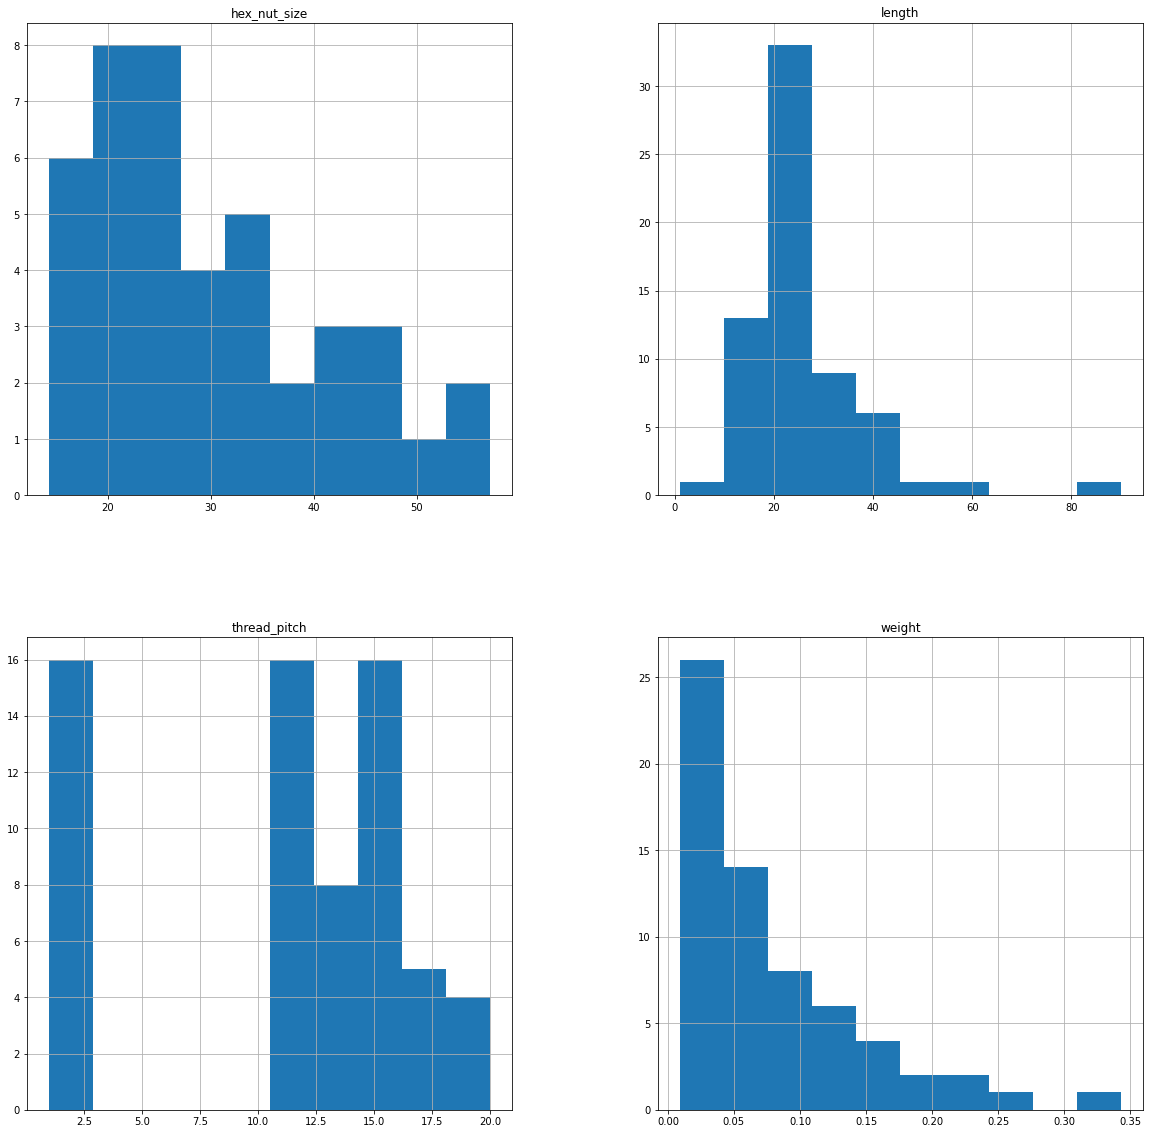

In [28]:
comp_nut.hist(figsize=(20,20))
plt.show()

In [29]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_nut.columns:
    if comp_nut[i].dtype != object:
        IQR = comp_nut[i].quantile(0.75)-comp_nut[i].quantile(0.25)
        upperThres = comp_nut[i].quantile(0.75)+3*IQR
        
        if comp_nut[i][comp_nut[i] > upperThres].any() == True:
            print(i)
            print(comp_nut.loc[comp_nut[i] == comp_nut[i].max()])



length
   component_id  hex_nut_size  length thread_size  thread_pitch  weight
49       C-0720           NaN    90.0         M12          1.75   0.222


In [30]:
comp_other.head()

,component_id,part_name,weight
0,C-1385,NUT-FLARED,0.014
1,C-1386,SLEEVE-FLARED,0.005
2,C-1369,COLLAR,0.003
3,C-0422,WASHER-FUEL LIN,0.003
4,C-1817,FITTING-NUT,0.014


In [31]:
#Dtop part_name
comp_other.drop(['part_name'], axis=1, inplace=True)
comp_other.head()



,component_id,weight
0,C-1385,0.014
1,C-1386,0.005
2,C-1369,0.003
3,C-0422,0.003
4,C-1817,0.014


In [32]:
comp_sleeve.head()

,component_id,component_type_id,connection_type_id,length,intended_nut_thread,intended_nut_pitch,unique_feature,plating,orientation,weight
0,C-0001,CP-024,B-001,17.3,1.062,12,No,No,No,0.013
1,C-0002,CP-024,B-001,11.2,0.500,20,No,No,No,0.005
2,C-0003,CP-024,B-001,19.3,1.187,12,No,No,No,0.014
3,C-0048,CP-024,B-002,9.5,0.562,18,No,No,No,0.006
4,C-0049,CP-024,B-002,9.5,0.812,16,No,No,No,0.012


In [33]:
comp_sleeve.drop(['component_type_id', 'connection_type_id', 'unique_feature', 'plating', 'orientation'], axis=1, inplace=True)
comp_sleeve.head()

,component_id,length,intended_nut_thread,intended_nut_pitch,weight
0,C-0001,17.3,1.062,12,0.013
1,C-0002,11.2,0.500,20,0.005
2,C-0003,19.3,1.187,12,0.014
3,C-0048,9.5,0.562,18,0.006
4,C-0049,9.5,0.812,16,0.012


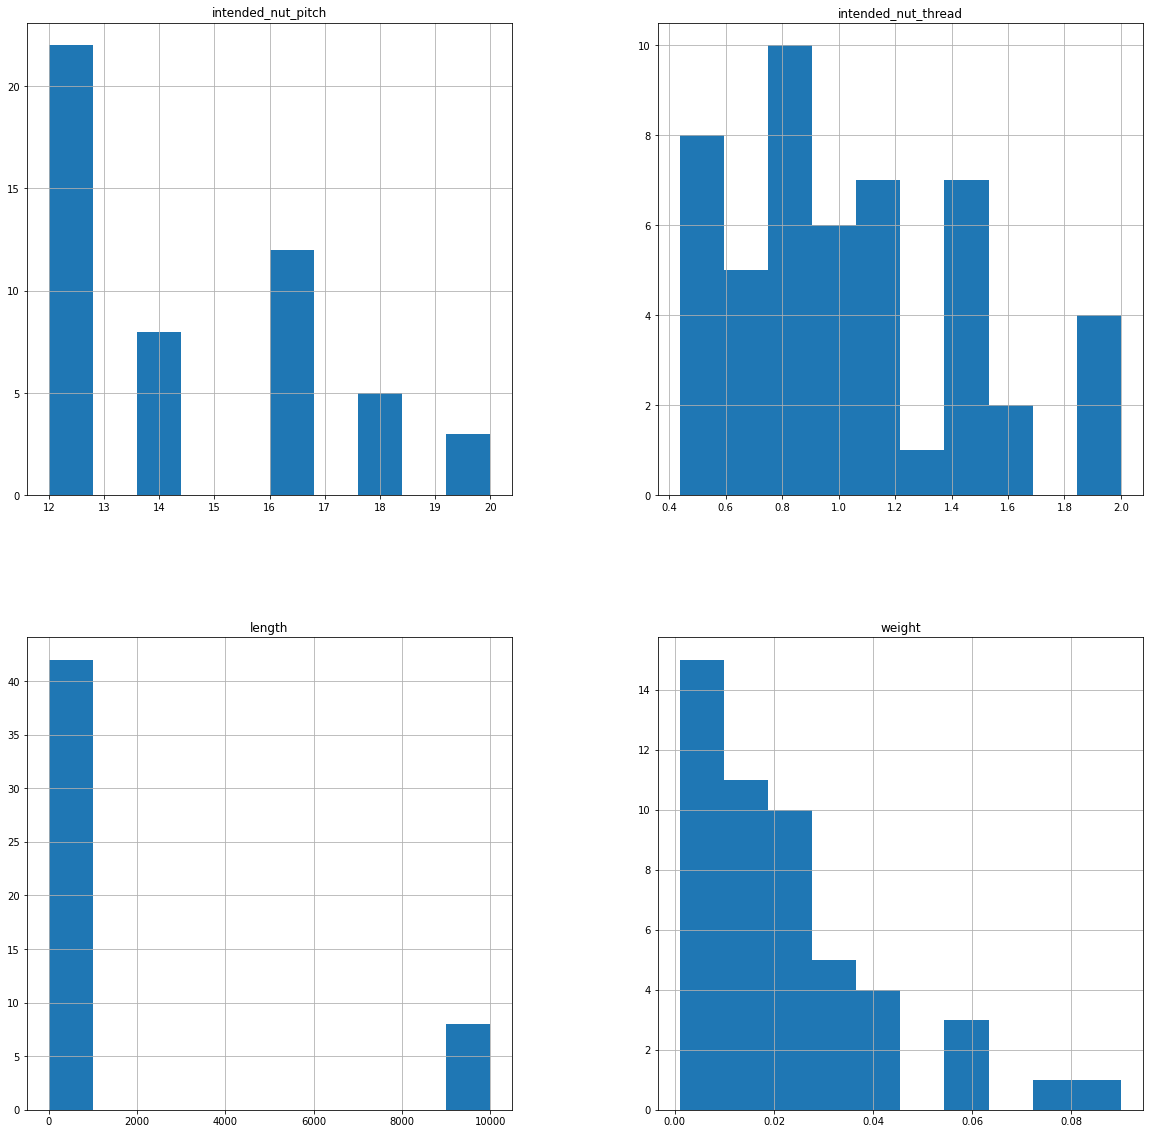

In [34]:
comp_sleeve.hist(figsize=(20,20))
plt.show()

In [35]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_sleeve.columns:
    if comp_sleeve[i].dtype != object:
        IQR = comp_sleeve[i].quantile(0.75)-comp_sleeve[i].quantile(0.25)
        upperThres = comp_sleeve[i].quantile(0.75)+3*IQR
        
        if comp_sleeve[i][comp_sleeve[i] > upperThres].any() == True:
            print(i)
            print(comp_sleeve.loc[comp_sleeve[i] == comp_sleeve[i].max()])



length
   component_id  length  intended_nut_thread  intended_nut_pitch  weight
28       C-1627  9999.0                0.562                  18   0.005
29       C-1628  9999.0                0.687                  16   0.006
30       C-1629  9999.0                0.812                  16   0.012
31       C-1630  9999.0                1.000                  14   0.018
32       C-1631  9999.0                1.187                  12   0.026
33       C-1632  9999.0                1.437                  12   0.033
34       C-1633  9999.0                1.687                  12   0.040
48       C-1866  9999.0                2.000                  12   0.035


In [0]:
comp_sleeve.drop(comp_sleeve.index[[28, 29, 30, 31, 32, 33, 34, 48]], inplace=True)

In [37]:
comp_straight.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,head_diameter,overall_length,thickness,mj_class_code,groove,unique_feature,orientation,weight
0,C-0012,CP-001,66.68,31.75,NaN,40.0,20.0,NaN,No,No,Yes,0.788
1,C-0014,CP-001,47.60,22.20,NaN,38.0,15.0,NaN,Yes,No,Yes,0.339
2,C-0015,CP-001,66.70,31.80,NaN,40.0,20.0,NaN,Yes,No,Yes,0.788
3,C-0019,CP-002,77.80,42.90,NaN,NaN,36.5,MJ-003,No,No,Yes,1.533
4,C-0029,CP-001,47.63,22.23,NaN,NaN,16.0,NaN,Yes,No,Yes,0.286


In [38]:
comp_straight.drop(['component_type_id', 'overall_length', 'mj_class_code', 'head_diameter', 'unique_feature', 'groove',
                    'orientation'], axis=1, inplace=True)
comp_straight.head()

,component_id,bolt_pattern_long,bolt_pattern_wide,thickness,weight
0,C-0012,66.68,31.75,20.0,0.788
1,C-0014,47.60,22.20,15.0,0.339
2,C-0015,66.70,31.80,20.0,0.788
3,C-0019,77.80,42.90,36.5,1.533
4,C-0029,47.63,22.23,16.0,0.286


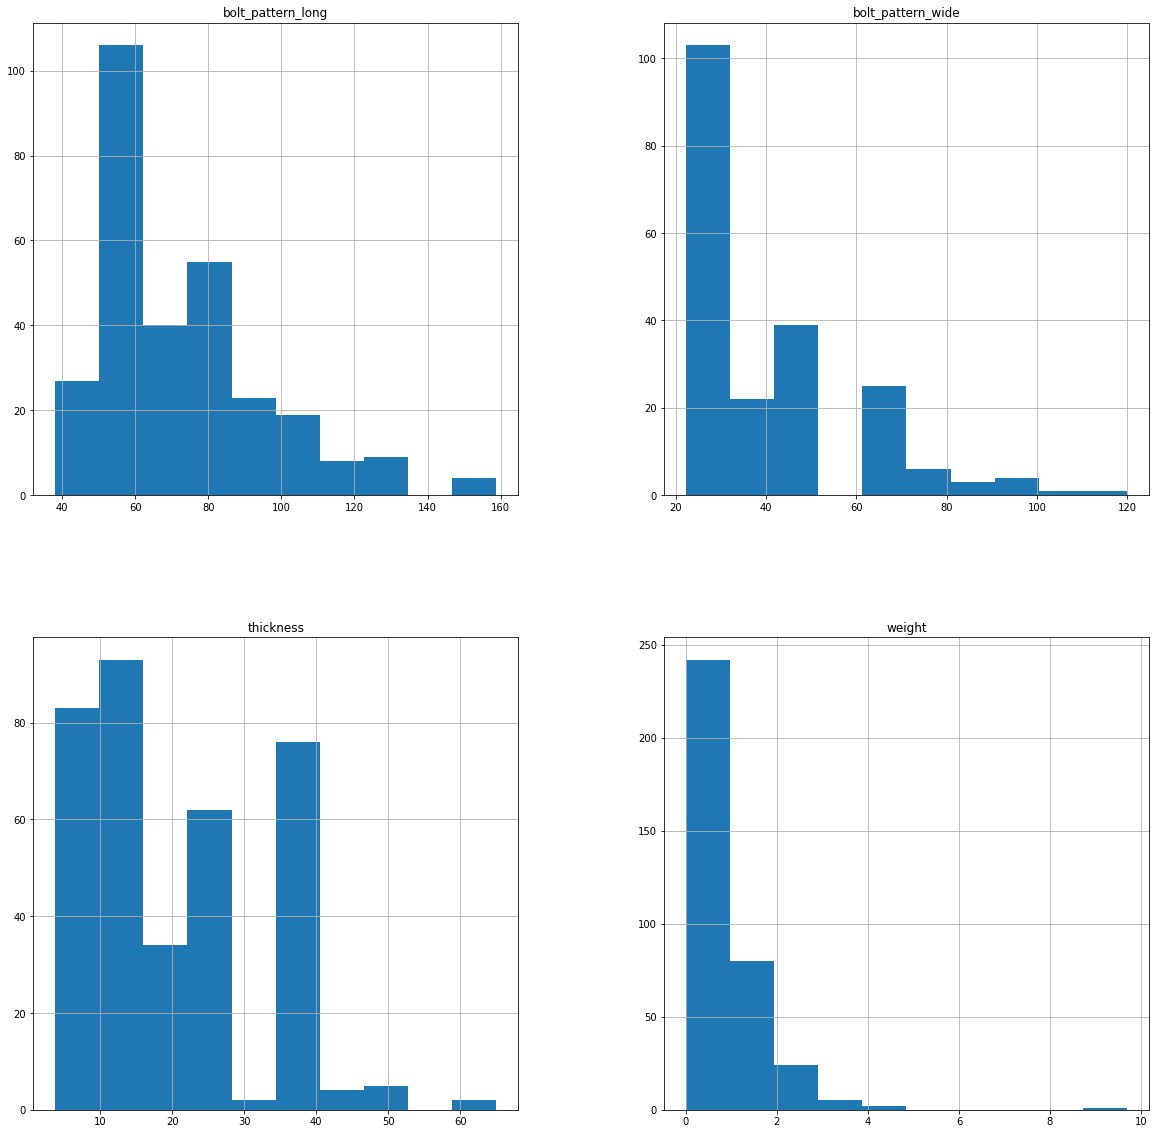

In [39]:
comp_straight.hist(figsize=(20,20))
plt.show()

In [40]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_straight.columns:
    if comp_straight[i].dtype != object:
        IQR = comp_straight[i].quantile(0.75)-comp_straight[i].quantile(0.25)
        upperThres = comp_straight[i].quantile(0.75)+3*IQR
        
        if comp_straight[i][comp_straight[i] > upperThres].any() == True:
            print(i)
            print(comp_straight.loc[comp_straight[i] == comp_straight[i].max()])



weight
    component_id  bolt_pattern_long  bolt_pattern_wide  thickness  weight
171       C-1066               38.1                NaN       13.0   9.693


In [41]:
comp_tee.head()

,component_id,component_type_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,mj_class_code,mj_plug_class_code,groove,unique_feature,orientation,weight
0,C-0271,OTHER,58.70,30.20,57.10,93.0,57,28.5,MJ-003,Threaded,No,No,Yes,1.526
1,C-1809,OTHER,58.72,30.18,57.09,108.0,57,28.5,MJ-003,MJ-005,No,No,Yes,2.184
2,C-1830,OTHER,52.40,26.20,43.50,78.5,51,25.5,MJ-003,Threaded,No,Yes,Yes,1.135
3,C-1865,OTHER,58.70,30.20,57.10,107.0,57,28.5,MJ-003,MJ-005,No,No,Yes,1.953


In [42]:
comp_tee.drop(['component_type_id', 'mj_class_code', 'mj_plug_class_code', 'groove', 'unique_feature', 'orientation'],
              axis=1, inplace=True)
comp_tee

,component_id,bolt_pattern_long,bolt_pattern_wide,extension_length,overall_length,thickness,drop_length,weight
0,C-0271,58.70,30.20,57.10,93.0,57,28.5,1.526
1,C-1809,58.72,30.18,57.09,108.0,57,28.5,2.184
2,C-1830,52.40,26.20,43.50,78.5,51,25.5,1.135
3,C-1865,58.70,30.20,57.10,107.0,57,28.5,1.953


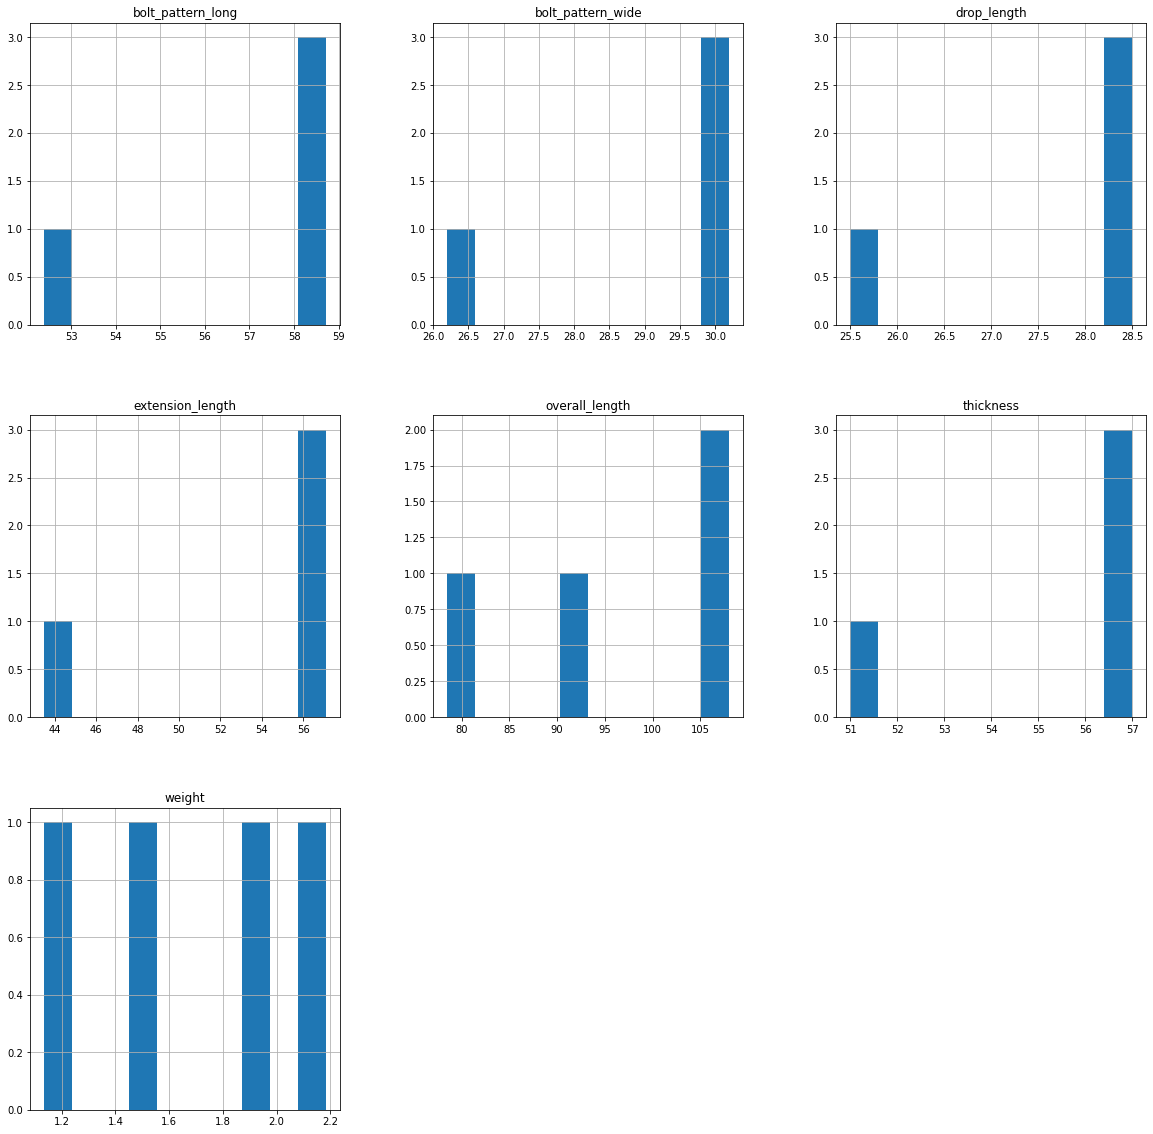

In [43]:
comp_tee.hist(figsize=(20,20))
plt.show()

In [0]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_tee.columns:
    if comp_tee[i].dtype != object:
        IQR = comp_tee[i].quantile(0.75)-comp_tee[i].quantile(0.25)
        upperThres = comp_tee[i].quantile(0.75)+3*IQR
        
        if comp_tee[i][comp_tee[i] > upperThres].any() == True:
            print(i)
            print(comp_tee.loc[comp_tee[i] == comp_tee[i].max()])



In [45]:
comp_threaded.head()

,component_id,component_type_id,adaptor_angle,overall_length,hex_size,end_form_id_1,connection_type_id_1,length_1,thread_size_1,thread_pitch_1,nominal_size_1,end_form_id_2,connection_type_id_2,length_2,thread_size_2,thread_pitch_2,nominal_size_2,end_form_id_3,connection_type_id_3,length_3,thread_size_3,thread_pitch_3,nominal_size_3,end_form_id_4,connection_type_id_4,length_4,thread_size_4,thread_pitch_4,nominal_size_4,unique_feature,orientation,weight
0,C-0007,CP-014,NaN,24.4,12.70,A-001,B-001,NaN,0.437,20.0,NaN,A-004,NaN,NaN,NaN,NaN,6.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.028
1,C-0030,CP-015,90.0,NaN,NaN,A-003,NaN,47.0,NaN,NaN,42,A-003,NaN,47.0,NaN,NaN,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Yes,0.914
2,C-0041,CP-014,NaN,28.0,32.00,A-004,NaN,NaN,NaN,NaN,21.7,A-001,B-002,NaN,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.120
3,C-0043,CP-014,NaN,38.0,27.00,A-003,NaN,NaN,NaN,NaN,21.7,A-001,B-002,NaN,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.090
4,C-0044,CP-014,NaN,30.5,41.28,A-004,NaN,NaN,NaN,NaN,34,A-001,B-002,NaN,1.437,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,No,0.182


In [46]:
comp_threaded.drop(['component_type_id', 'adaptor_angle', 'end_form_id_1', 'connection_type_id_1', 'end_form_id_2',
                    'connection_type_id_2', 'end_form_id_3', 'connection_type_id_3', 'end_form_id_4', 'connection_type_id_4',
                    'nominal_size_4', 'unique_feature', 'orientation'], axis=1, inplace=True)
comp_threaded.head()

,component_id,overall_length,hex_size,length_1,thread_size_1,thread_pitch_1,nominal_size_1,length_2,thread_size_2,thread_pitch_2,nominal_size_2,length_3,thread_size_3,thread_pitch_3,nominal_size_3,length_4,thread_size_4,thread_pitch_4,weight
0,C-0007,24.4,12.70,NaN,0.437,20.0,NaN,NaN,NaN,NaN,6.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028
1,C-0030,NaN,NaN,47.0,NaN,NaN,42,47.0,NaN,NaN,42.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914
2,C-0041,28.0,32.00,NaN,NaN,NaN,21.7,NaN,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120
3,C-0043,38.0,27.00,NaN,NaN,NaN,21.7,NaN,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090
4,C-0044,30.5,41.28,NaN,NaN,NaN,34,NaN,1.437,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.182


In [47]:
#There are five columns with length. So I fill NA with 0, summarize length and drop excessive columns.
comp_threaded['length_1'] = comp_threaded['length_1'].fillna(0)
comp_threaded['length_2'] = comp_threaded['length_2'].fillna(0)
comp_threaded['length_3'] = comp_threaded['length_3'].fillna(0)
comp_threaded['length_4'] = comp_threaded['length_4'].fillna(0)
comp_threaded['overall_length'] = comp_threaded['overall_length'].fillna(0)
comp_threaded['overall_length'] = comp_threaded['overall_length'] + comp_threaded['length_1'] + comp_threaded['length_2'] + comp_threaded['length_3'] + comp_threaded['length_4']

comp_threaded.drop(['length_1', 'length_2', 'length_3', 'length_4'], axis=1, inplace=True)

comp_threaded.head()

,component_id,overall_length,hex_size,thread_size_1,thread_pitch_1,nominal_size_1,thread_size_2,thread_pitch_2,nominal_size_2,thread_size_3,thread_pitch_3,nominal_size_3,thread_size_4,thread_pitch_4,weight
0,C-0007,24.4,12.70,0.437,20.0,NaN,NaN,NaN,6.35,NaN,NaN,NaN,NaN,NaN,0.028
1,C-0030,94.0,NaN,NaN,NaN,42,NaN,NaN,42.00,NaN,NaN,NaN,NaN,NaN,0.914
2,C-0041,28.0,32.00,NaN,NaN,21.7,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.120
3,C-0043,38.0,27.00,NaN,NaN,21.7,0.812,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0.090
4,C-0044,30.5,41.28,NaN,NaN,34,1.437,12.0,NaN,NaN,NaN,NaN,NaN,NaN,0.182


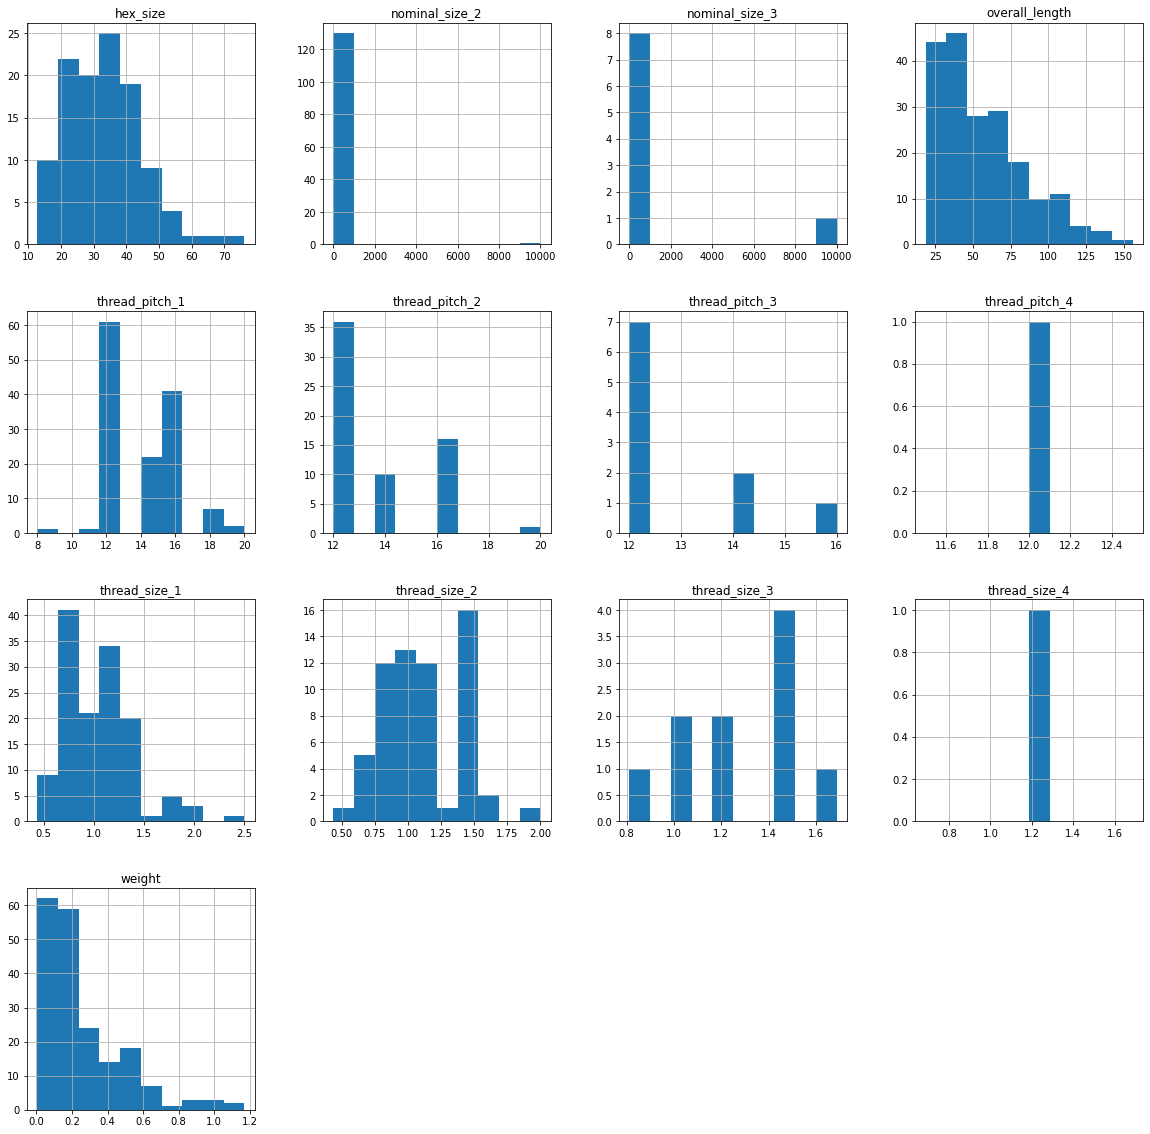

In [48]:
comp_threaded.hist(figsize=(20,20))
plt.show()

In [49]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in comp_threaded.columns:
    if comp_threaded[i].dtype != object:
        IQR = comp_threaded[i].quantile(0.75)-comp_threaded[i].quantile(0.25)
        upperThres = comp_threaded[i].quantile(0.75)+3*IQR
        
        if comp_threaded[i][comp_threaded[i] > upperThres].any() == True:
            print(i)
            print(comp_threaded.loc[comp_threaded[i] == comp_threaded[i].max()])



thread_size_1
   component_id  overall_length  hex_size  thread_size_1  thread_pitch_1 nominal_size_1  thread_size_2  thread_pitch_2  nominal_size_2  thread_size_3  thread_pitch_3  nominal_size_3  thread_size_4  thread_pitch_4  weight
67       C-0651            72.4      76.2            2.5             8.0            NaN            NaN             NaN            63.5            NaN             NaN             NaN            NaN             NaN   0.968
nominal_size_2
   component_id  overall_length  hex_size  thread_size_1  thread_pitch_1 nominal_size_1  thread_size_2  thread_pitch_2  nominal_size_2  thread_size_3  thread_pitch_3  nominal_size_3  thread_size_4  thread_pitch_4  weight
40       C-0386            42.7      60.3            2.0            12.0            NaN            NaN             NaN          9999.0            NaN             NaN             NaN            NaN             NaN   0.543
nominal_size_3
   component_id  overall_length  hex_size  thread_size_1  thread_pitch_1

In [0]:
comp_threaded.drop(comp_threaded.index[[40, 90]], inplace=True)

In [51]:
tube.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164.0,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137.0,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127.0,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137.0,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109.0,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [52]:
tube.drop(['material_id', 'end_a_1x', 'end_a_2x', 'end_x_1x', 'end_x_2x', 'end_a', 'end_x', 'num_boss', 'num_bracket', 'other'],
          axis=1, inplace=True)
tube.head()

,tube_assembly_id,diameter,wall,length,num_bends,bend_radius
0,TA-00001,12.70,1.65,164.0,5,38.10
1,TA-00002,6.35,0.71,137.0,8,19.05
2,TA-00003,6.35,0.71,127.0,7,19.05
3,TA-00004,6.35,0.71,137.0,9,19.05
4,TA-00005,19.05,1.24,109.0,4,50.80


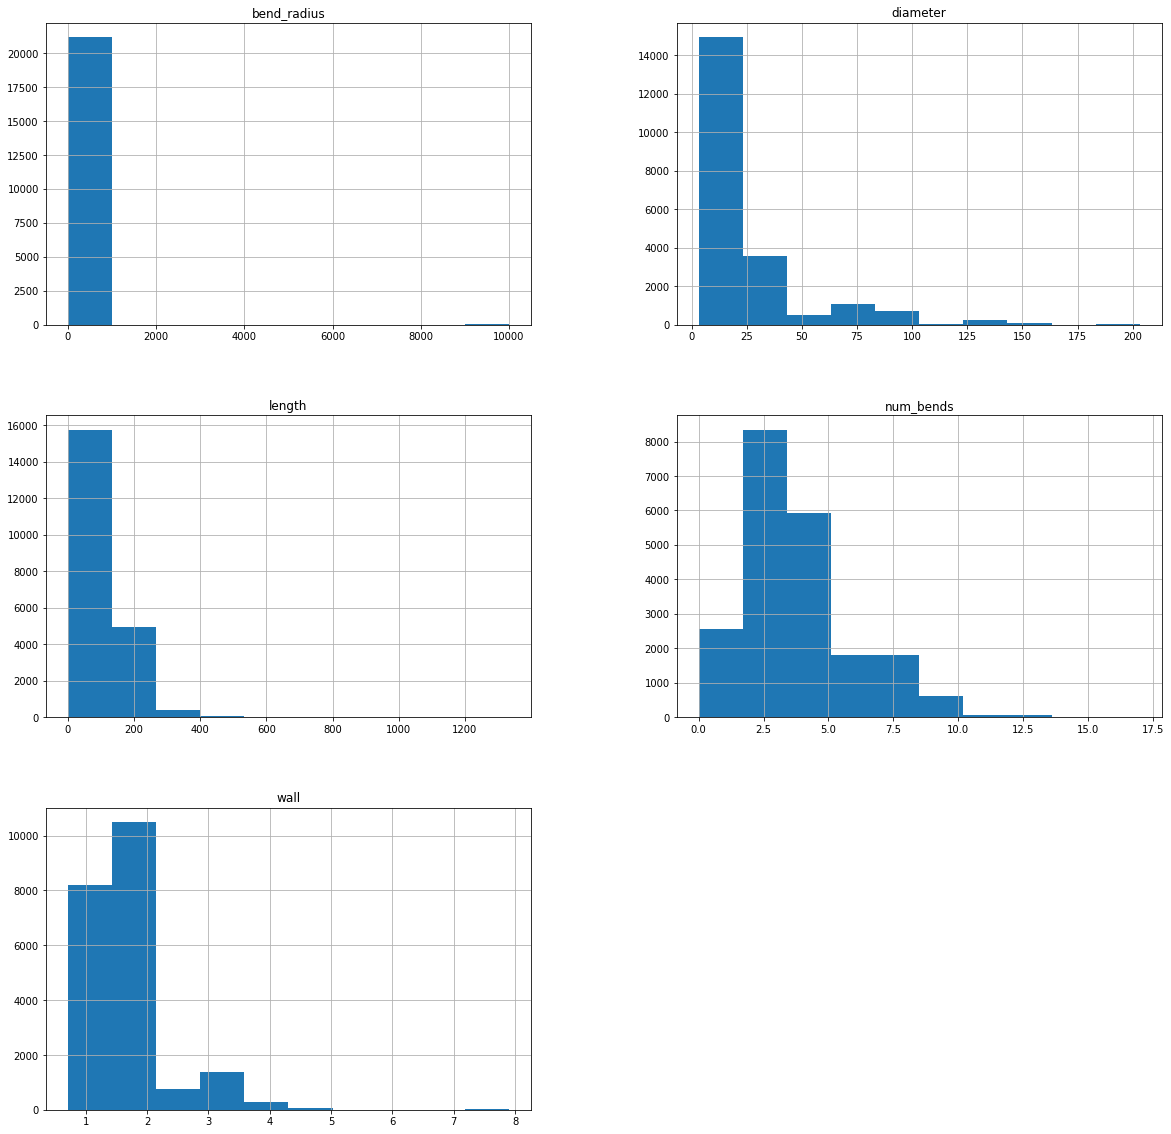

In [53]:
tube.hist(figsize=(20,20))
plt.show()

In [54]:
#outlier detection through IQR proximity rule as the distribution is skewed

for i in tube.columns:
    if tube[i].dtype != object:
        IQR = tube[i].quantile(0.75)-tube[i].quantile(0.25)
        upperThres = tube[i].quantile(0.75)+3*IQR
        
        if tube[i][tube[i] > upperThres].any() == True:
            print(i)
            print(tube.loc[tube[i] == tube[i].max()])



diameter
      tube_assembly_id  diameter  wall  length  num_bends  bend_radius
11306         TA-11307     203.2   1.9    62.0          0          0.0
11309         TA-11310     203.2   1.9    48.0          0          0.0
11341         TA-11342     203.2   1.9    40.0          0          0.0
13049         TA-13050     203.2   1.9    70.0          0          0.0
14709         TA-14710     203.2   1.9    64.0          0          0.0
15619         TA-15620     203.2   1.9    26.0          0          0.0
16762         TA-16763     203.2   1.9   129.0          2        203.2
17421         TA-17422     203.2   1.9    22.0          0          0.0
wall
      tube_assembly_id  diameter  wall  length  num_bends  bend_radius
389           TA-00390      66.7   7.9   310.0          2       177.80
390           TA-00391      66.7   7.9   393.0          2       177.80
391           TA-00392      66.7   7.9   174.0          2       177.80
392           TA-00393      66.7   7.9   188.0          2      

In [0]:
tube.drop(tube.index[[17689,17689,18002,18003,15132, 15174, 15175, 17688, 17689, 18002, 18003, 19320]], inplace=True)

In [56]:


# below  files contain only has text descriptions, so I decided not to use them:

# tube_end_form

# type_component

# type_connection

# type_end_form

# components

components.head()

,component_id,name,component_type_id
0,9999,OTHER,OTHER
1,C-0001,SLEEVE,CP-024
2,C-0002,SLEEVE,CP-024
3,C-0003,SLEEVE-FLARED,CP-024
4,C-0004,NUT,CP-026


# Data Preparation

In [57]:
train.head()

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [0]:
#Create several features from dates for additional information.
train['year'] = train.quote_date.dt.year
train['month'] = train.quote_date.dt.month
train['dayofyear'] = train.quote_date.dt.dayofyear
train['dayofweek'] = train.quote_date.dt.dayofweek
train['day'] = train.quote_date.dt.day

test['year'] = test.quote_date.dt.year
test['month'] = test.quote_date.dt.month
test['dayofyear'] = test.quote_date.dt.dayofyear
test['dayofweek'] = test.quote_date.dt.dayofweek
test['day'] = test.quote_date.dt.day

train = train.drop('quote_date',axis=1)
test = test.drop('quote_date',axis=1)

In [59]:
train.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,6,7
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,6,7
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,6,7
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,6,7
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,6,7


In [60]:
#I combine all files with info on components in one file.
all_comp = pd.concat([comp_adaptor, comp_boss, comp_elbow, comp_float, comp_hfl, comp_nut, comp_other,
                      comp_sleeve, comp_straight, comp_tee, comp_threaded])

all_comp.head()

,component_id,overall_length,thread_size_1,thread_pitch_1,nominal_size_1,thread_size_2,thread_pitch_2,nominal_size_2,hex_size,weight,height_over_tube,bolt_pattern_long,bolt_pattern_wide,extension_length,thickness,drop_length,elbow_angle,hose_diameter,hex_nut_size,length,thread_size,thread_pitch,intended_nut_thread,intended_nut_pitch,thread_size_3,thread_pitch_3,nominal_size_3,thread_size_4,thread_pitch_4
0,C-0005,58.4,1.312,12.0,NaN,1.000,11.5,NaN,34.93,0.206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-0006,34.8,0.437,20.0,NaN,0.750,16.0,NaN,22.20,0.083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,C-1435,20.3,NaN,NaN,15.88,0.875,18.0,NaN,22.22,0.023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,C-1546,26.4,0.125,27.0,NaN,0.125,27.0,NaN,15.88,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,C-1583,44.5,1.312,12.0,NaN,1.062,12.0,NaN,38.10,0.256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
all_comp.shape

(2033, 29)

In [62]:
all_comp.isnull().sum()

component_id              0
overall_length         1640
thread_size_1          1884
thread_pitch_1         1884
nominal_size_1         1966
thread_size_2          1950
thread_pitch_2         1950
nominal_size_2         1901
hex_size               1907
weight                   69
height_over_tube       1887
bolt_pattern_long      1552
bolt_pattern_wide      1671
extension_length       1860
thickness              1482
drop_length            1859
elbow_angle            1904
hose_diameter          2027
hex_nut_size           1991
length                 1926
thread_size            1968
thread_pitch           1968
intended_nut_thread    1991
intended_nut_pitch     1991
thread_size_3          2023
thread_pitch_3         2023
nominal_size_3         2025
thread_size_4          2032
thread_pitch_4         2032
dtype: int64

In [63]:
all_comp = all_comp[['component_id', 'weight', 'length', 'overall_length', 'thickness']]
all_comp.head()

,component_id,weight,length,overall_length,thickness
0,C-0005,0.206,NaN,58.4,NaN
1,C-0006,0.083,NaN,34.8,NaN
2,C-1435,0.023,NaN,20.3,NaN
3,C-1546,0.026,NaN,26.4,NaN
4,C-1583,0.256,NaN,44.5,NaN


In [64]:


#Combine two length columns.
all_comp['overall_length'] = all_comp['overall_length'].fillna(0)
all_comp['length'] = all_comp['length'].fillna(0)
all_comp['length'] = all_comp['length'] + all_comp['overall_length']
all_comp = all_comp.drop(['overall_length'], axis=1)

all_comp['weight'] = all_comp['weight'].fillna(0)
all_comp['thickness'] = all_comp['thickness'].fillna(0)

all_comp.head()

,component_id,weight,length,thickness
0,C-0005,0.206,58.4,0.0
1,C-0006,0.083,34.8,0.0
2,C-1435,0.023,20.3,0.0
3,C-1546,0.026,26.4,0.0
4,C-1583,0.256,44.5,0.0


In [65]:
#Add information about tube itself and the list of components to main files.
train = pd.merge(train, tube, on='tube_assembly_id', how='left')
train = pd.merge(train, bill_of_materials, on ='tube_assembly_id', how='left')
print(train.shape)
test = pd.merge(test, tube, on='tube_assembly_id', how='left')
test = pd.merge(test, bill_of_materials, on ='tube_assembly_id', how='left')
print(test.shape)

(30213, 33)
(30235, 33)


In [0]:
#Rename columns so that they will be different from length of components.
train.rename(columns={'length': 'length_t'}, inplace = True)
test.rename(columns={'length': 'length_t'}, inplace = True)

In [0]:
#Merging to get information about components
for i in range(1, 9, 2):
    suffix1 = '_' + str(i)
    suffix2 = '_' + str(i + 1)
    component_1 = 'component_id' + suffix1
    component_2 = 'component_id' + suffix2
    
    train = pd.merge(train, all_comp, left_on = component_1, right_on = 'component_id', how='left')
    train = pd.merge(train, all_comp, left_on = component_2, right_on = 'component_id', suffixes=(suffix1, suffix2), how='left')
    
    test = pd.merge(test, all_comp, left_on = component_1, right_on = 'component_id', how='left')
    test = pd.merge(test, all_comp, left_on = component_2, right_on = 'component_id', suffixes=(suffix1, suffix2), how='left')

In [68]:
train.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day,diameter,wall,length_t,num_bends,bend_radius,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8,component_id_1,weight_1,length_1,thickness_1,component_id_2,weight_2,length_2,thickness_2,component_id_3,weight_3,length_3,thickness_3,component_id_4,weight_4,length_4,thickness_4,component_id_5,weight_5,length_5,thickness_5,component_id_6,weight_6,length_6,thickness_6,component_id_7,weight_7,length_7,thickness_7,component_id_8,weight_8,length_8,thickness_8
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,C-1312,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C-1312,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
print(train.shape)
train.isnull().sum()

(30213, 65)


tube_assembly_id          0
supplier                  0
annual_usage              0
min_order_quantity        0
bracket_pricing           0
quantity                  0
cost                      0
year                      0
month                     0
dayofyear                 0
dayofweek                 0
day                       0
diameter                 12
wall                     12
length_t                 12
num_bends                12
bend_radius              12
component_id_1         1462
quantity_1             1462
component_id_2         9129
quantity_2             9129
component_id_3        23058
quantity_3            23042
component_id_4        29426
quantity_4            29426
component_id_5        30147
quantity_5            30147
component_id_6        30185
quantity_6            30185
component_id_7        30205
quantity_7            30205
component_id_8        30210
quantity_8            30210
component_id_1         1921
weight_1               1921
length_1            

In [70]:
#Drop unnecessary columns
train.drop(['component_id_1', 'component_id_2', 'component_id_3', 'component_id_4', 'component_id_5', 'component_id_6',
            'component_id_7', 'component_id_8'], axis=1, inplace=True)
test.drop(['component_id_1', 'component_id_2', 'component_id_3', 'component_id_4', 'component_id_5', 'component_id_6',
            'component_id_7', 'component_id_8'], axis=1, inplace=True)
train.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day,diameter,wall,length_t,num_bends,bend_radius,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8,weight_1,length_1,thickness_1,weight_2,length_2,thickness_2,weight_3,length_3,thickness_3,weight_4,length_4,thickness_4,weight_5,length_5,thickness_5,weight_6,length_6,thickness_6,weight_7,length_7,thickness_7,weight_8,length_8,thickness_8
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Add descriptive information about specs.
train = pd.merge(train, specs, on='tube_assembly_id', how='left')
test = pd.merge(test, specs, on='tube_assembly_id', how='left')

In [72]:
train.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day,diameter,wall,length_t,num_bends,bend_radius,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8,weight_1,length_1,thickness_1,weight_2,length_2,thickness_2,weight_3,length_3,thickness_3,weight_4,length_4,thickness_4,weight_5,length_5,thickness_5,weight_6,length_6,thickness_6,weight_7,length_7,thickness_7,weight_8,length_8,thickness_8,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Calculate various additional features on physical parameters. They turned out to be useful.
length_columns = [col for col in list(train.columns) if 'length' in col]
weight_columns = [col for col in list(train.columns) if 'weight' in col]
thickness_columns = [col for col in list(train.columns) if 'thickness' in col]
train['avg_w'] = train[weight_columns].mean(axis=1)
train['avg_l'] = train[length_columns].mean(axis=1)
train['avg_th'] = train[thickness_columns].mean(axis=1)
train['min_w'] = train[weight_columns].min(axis=1)
train['min_l'] = train[length_columns].min(axis=1)
train['min_th'] = train[thickness_columns].min(axis=1)
train['max_w'] = train[weight_columns].max(axis=1)
train['max_l'] = train[length_columns].max(axis=1)
train['max_th'] = train[thickness_columns].max(axis=1)
test['avg_w'] = test[weight_columns].mean(axis=1)
test['avg_l'] = test[length_columns].mean(axis=1)
test['avg_th'] = test[thickness_columns].mean(axis=1)
test['min_w'] = test[weight_columns].min(axis=1)
test['min_l'] = test[length_columns].min(axis=1)
test['min_th'] = test[thickness_columns].min(axis=1)
test['max_w'] = test[weight_columns].max(axis=1)
test['max_l'] = test[length_columns].max(axis=1)
test['max_th'] = test[thickness_columns].max(axis=1)
train['tot_w'] = train[weight_columns].sum(axis=1)
train['tot_l'] = train[length_columns].sum(axis=1)
test['tot_w'] = test[weight_columns].sum(axis=1)
test['tot_l'] = test[length_columns].sum(axis=1)

In [74]:
train.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day,diameter,wall,length_t,num_bends,bend_radius,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8,weight_1,length_1,thickness_1,weight_2,length_2,thickness_2,weight_3,length_3,thickness_3,weight_4,length_4,thickness_4,weight_5,length_5,thickness_5,weight_6,length_6,thickness_6,weight_7,length_7,thickness_7,weight_8,length_8,thickness_8,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10,avg_w,avg_l,avg_th,min_w,min_l,min_th,max_w,max_l,max_th,tot_w,tot_l
0,TA-00002,S-0066,0,0,Yes,1,21.905933,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2
1,TA-00002,S-0066,0,0,Yes,2,12.341214,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2
2,TA-00002,S-0066,0,0,Yes,5,6.601826,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2
3,TA-00002,S-0066,0,0,Yes,10,4.687770,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2
4,TA-00002,S-0066,0,0,Yes,25,3.541561,2013,7,188,6,7,6.35,0.71,137.0,8.0,19.05,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,14.2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.009,151.2


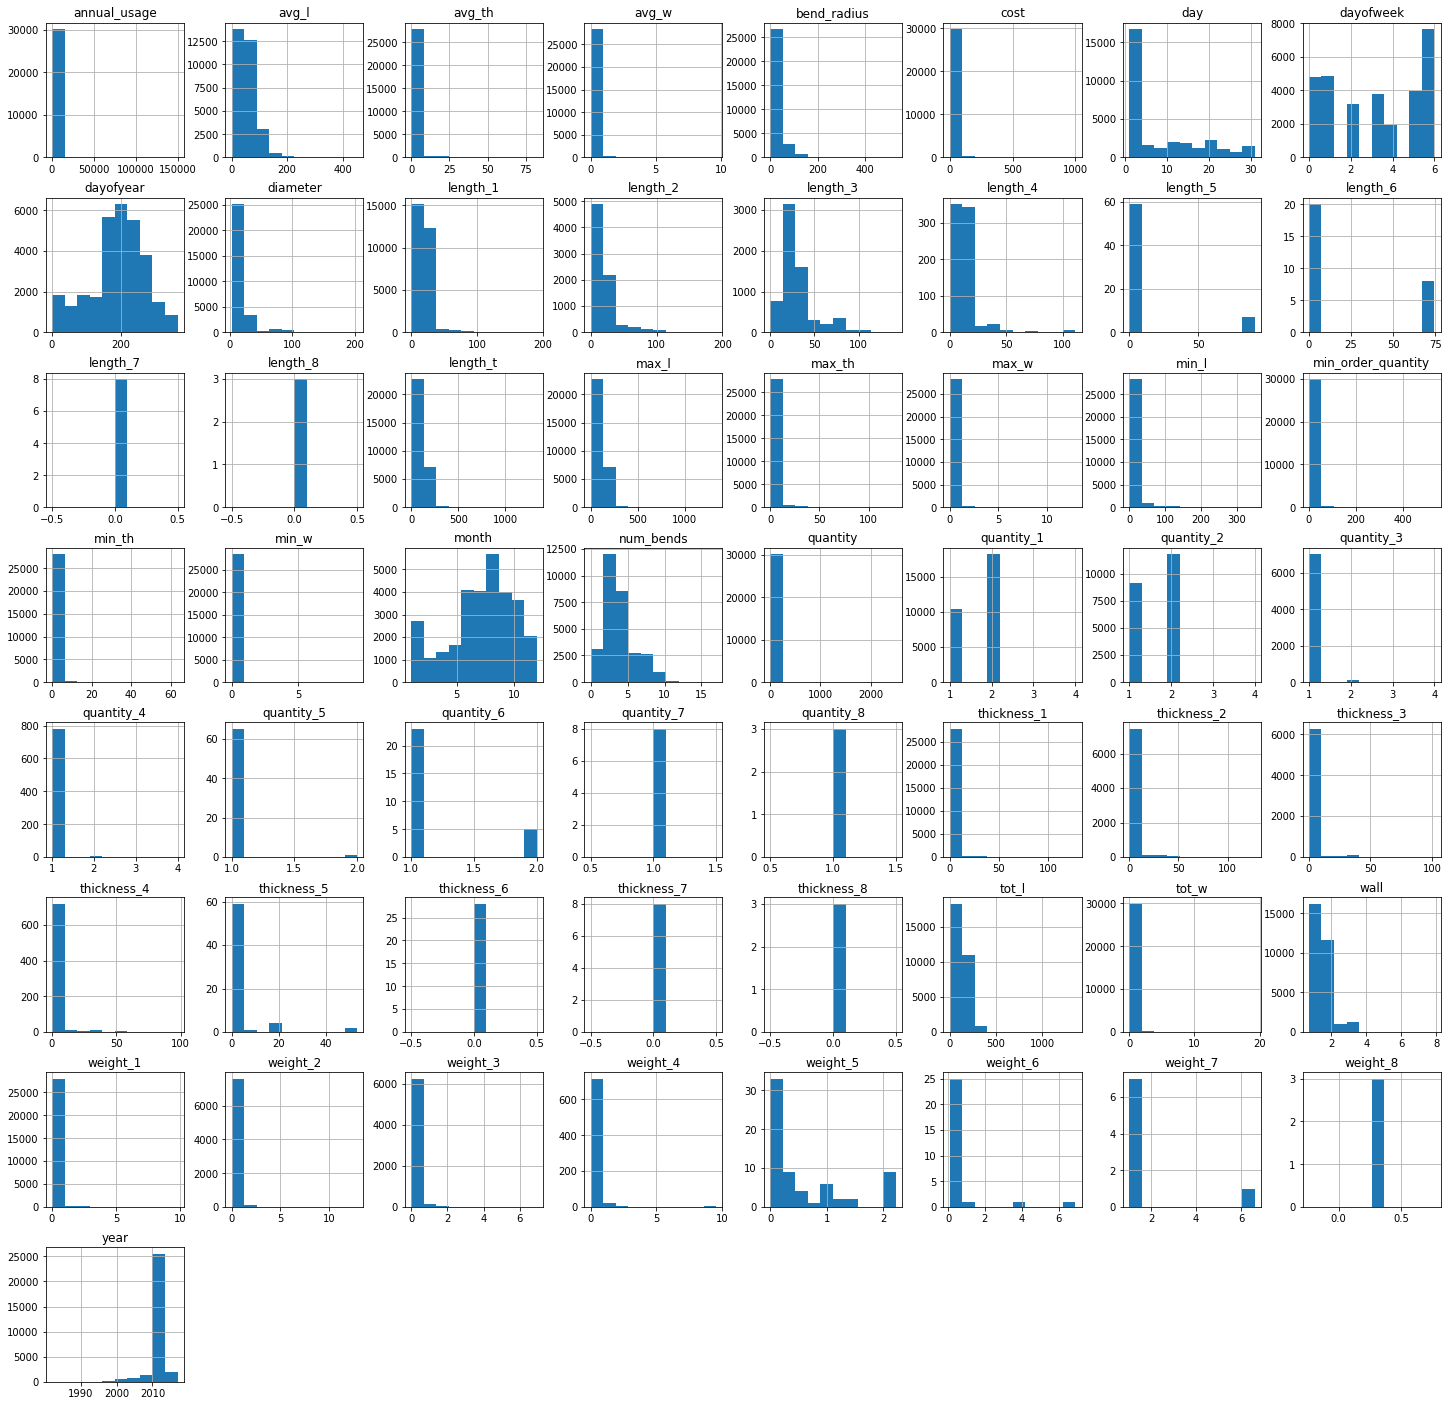

In [75]:
feat_name= [col for col in train.columns if train[col].dtype != 'object']
train[feat_name].hist(figsize=(25,25))
plt.show()

In [0]:
#Take log of skewered columns to smooth them and fill NA.
for col in train.columns:
    if train[col].dtype != 'object':
        if skew(train[col]) > 0.75:
            train[col] = np.log1p(train[col])
            train[col] = train[col].apply(lambda x: 0 if x == -np.inf else x)

        train[col] = train[col].fillna(0)
        
for col in test.columns:
    if test[col].dtype != 'object':
        if skew(test[col]) > 0.75:
            test[col] = np.log1p(test[col])
            test[col] = test[col].apply(lambda x: 0 if x == -np.inf else x)

        test[col] = test[col].fillna(0)

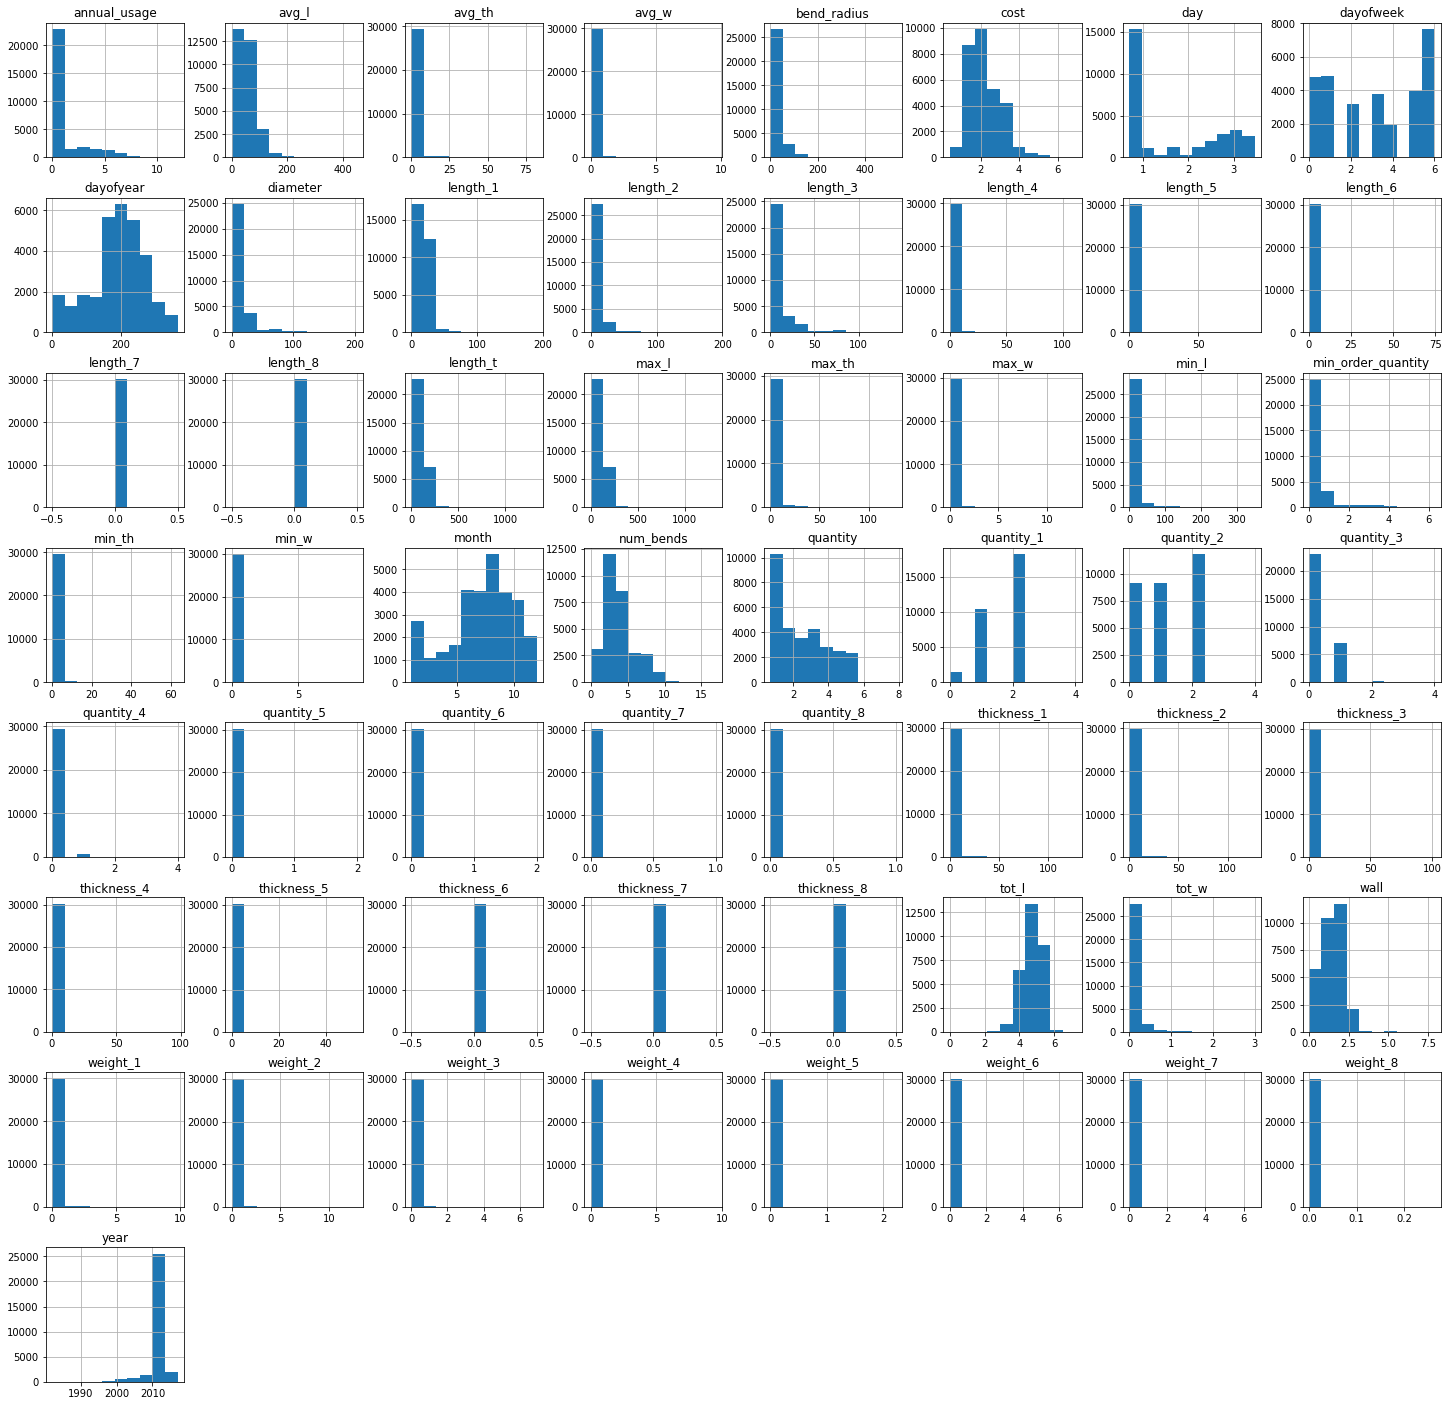

In [77]:
feat_name= [col for col in train.columns if train[col].dtype != 'object']
train[feat_name].hist(figsize=(25,25))
plt.show()

In [0]:
for col in train.columns:
    if train[col].dtype == 'object':
        train[col].replace(np.nan,' ', regex=True, inplace= True)
for col in test.columns:
    if test[col].dtype == 'object':
        test[col].replace(np.nan,' ', regex=True, inplace= True)

In [79]:
train.head()

,tube_assembly_id,supplier,annual_usage,min_order_quantity,bracket_pricing,quantity,cost,year,month,dayofyear,dayofweek,day,diameter,wall,length_t,num_bends,bend_radius,quantity_1,quantity_2,quantity_3,quantity_4,quantity_5,quantity_6,quantity_7,quantity_8,weight_1,length_1,thickness_1,weight_2,length_2,thickness_2,weight_3,length_3,thickness_3,weight_4,length_4,thickness_4,weight_5,length_5,thickness_5,weight_6,length_6,thickness_6,weight_7,length_7,thickness_7,weight_8,length_8,thickness_8,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10,avg_w,avg_l,avg_th,min_w,min_l,min_th,max_w,max_l,max_th,tot_w,tot_l
0,TA-00002,S-0066,0.0,0.0,Yes,0.693147,3.131396,2013,7,188,6,2.079442,6.35,0.71,137.0,8.0,19.05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195
1,TA-00002,S-0066,0.0,0.0,Yes,1.098612,2.590858,2013,7,188,6,2.079442,6.35,0.71,137.0,8.0,19.05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195
2,TA-00002,S-0066,0.0,0.0,Yes,1.791759,2.028389,2013,7,188,6,2.079442,6.35,0.71,137.0,8.0,19.05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195
3,TA-00002,S-0066,0.0,0.0,Yes,2.397895,1.738318,2013,7,188,6,2.079442,6.35,0.71,137.0,8.0,19.05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195
4,TA-00002,S-0066,0.0,0.0,Yes,3.258097,1.513271,2013,7,188,6,2.079442,6.35,0.71,137.0,8.0,19.05,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009,14.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,,,,,,,,,,,0.009,75.6,0.0,0.009,14.2,0.0,0.009,137.0,0.0,0.00896,5.025195


In [0]:
X_train = train.drop('cost',axis=1)
Y_train = train['cost']
X_test  = test.drop('id', axis=1)

In [81]:
X_train.shape,X_test.shape

((30213, 69), (30235, 69))

In [82]:
feat_name = [col for col in X_train.columns if X_train[col].dtypes == 'O']
feat_index = [X_train.columns.get_loc(c) for c in feat_name if c in X_train]
feat_name,feat_index

(['tube_assembly_id',
  'supplier',
  'bracket_pricing',
  'spec1',
  'spec2',
  'spec3',
  'spec4',
  'spec5',
  'spec6',
  'spec7',
  'spec8',
  'spec9',
  'spec10'],
 [0, 1, 4, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57])

In [0]:
#Convert to arrays for easier transformation
X_train = np.array(X_train)
X_test = np.array(X_test)

In [0]:
from sklearn.preprocessing import LabelEncoder

#label encoding

for i in feat_index:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(X_train[:,i]) + list(X_test[:,i]))
    X_train[:,i] = lbl.transform(X_train[:,i])
    X_test[:,i] = lbl.transform(X_test[:,i])



In [85]:
X_train

array([[1, 41, 0.0, ..., 0.0, 0.008959741371471906, 5.025195445427586],
       [1, 41, 0.0, ..., 0.0, 0.008959741371471906, 5.025195445427586],
       [1, 41, 0.0, ..., 0.0, 0.008959741371471906, 5.025195445427586],
       ...,
       [17706, 27, 0.6931471805599453, ..., 12.0, 0.11154137473290743,
        4.465908118654584],
       [17707, 39, 6.0473721790462776, ..., 0.0, 0.0, 3.912023005428146],
       [17708, 17, 1.3862943611198906, ..., 28.4, 0.21913552991667093,
        4.328098292648326]], dtype=object)

In [0]:
#XGB need float.
X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Model Building and Evaluation

In [87]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.20, random_state=10)
print()
print('Training Data Size :',x_train.shape)
print('Test Data Size :',x_test.shape)
print('Training Label Size :',y_train.shape)
print('Testing Label Size :',y_test.shape)


Training Data Size : (24170, 69)
Test Data Size : (6043, 69)
Training Label Size : (24170,)
Testing Label Size : (6043,)


In [88]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

param ={
            'n_estimators': [100,500, 1000,1500],
            'max_depth':[2,4,6,8]
        }

xgboost_tree = xgb.XGBRegressor(
    eta = 0.1,
    min_child_weight = 2,
    subsample = 0.8,
    colsample_bytree = 0.8,
    tree_method = 'exact',
    reg_alpha = 0.05,
    silent = 0,
    random_state = 1023
)

grid = GridSearchCV(estimator=xgboost_tree,param_grid=param,cv=5,  verbose=10, n_jobs=-1,scoring='neg_mean_squared_error')
      
grid_result = grid.fit(x_train, y_train)
best_params = grid_result.best_params_

print('Best Params :',best_params)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   49.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed: 28.5min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 44.4min finished


[12:28:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best Params : {'max_depth': 6, 'n_estimators': 1500}


In [89]:
from math import sqrt
from sklearn.metrics import mean_squared_error

pred = grid_result.predict(x_test)
print('Root Mean squared error {}'.format(sqrt(mean_squared_error(np.exp(y_test), np.exp(pred)))))

Root Mean squared error 12.214699919434327


In [90]:
diff = pd.concat([np.exp(y_test).reset_index(drop='True'),pd.DataFrame(np.exp(pred)).reset_index(drop='True')],axis=1)
diff.columns = ['Orginal','Prediction']
diff['Diff'] = diff.Orginal - diff.Prediction
diff.head()

,Orginal,Prediction,Diff
0,7.841083,7.849874,-0.008791
1,5.159178,3.615638,1.543540
2,10.200269,10.323025,-0.122755
3,333.088826,290.749207,42.339619
4,25.685210,31.137457,-5.452247
